<a href="https://colab.research.google.com/github/LaouaMERiLO/Machine-Learning/blob/main/Machine_Learning_II.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Course Description
This is the second course in the machine learning sequence.  The course discusses different learning frameworks and contrasts them including: supervised, unsupervised and semi-supervised models, generative and discriminative learning, parametric/non-parametric learning, frequentist and Bayesian methods. Topics covered also include decision trees, ensemble methods, neural networks and deep learning, reinforcement learning, and topics in machine learning theory. The course discusses issues in large-scale machine learning. Concepts are discussed in the context of applications such as collaborative filtering, autonomous navigation, intrusion detection,  text and web data processing, and recommender systems.

**Text book:**
1.	Pattern Recognition and Machine Learning, Christopher Bishop, Springer.
2.	Pattern Classification, 2nd Ed. Richard O. Duda, Peter E. Hart, David G. Stork.
3.	Applied Predictive Modeling  2nd ed, by Max Kuhn, Kjell Johnson.

**Course Contents:**
0. Evaluating ML Models
1. Generative vs. Discriminative Learning
2.	Different learning paradigms: supervised, unsupervised, and semi-supervised.
4.	Density Estimation and Anomaly  
9.	Graphical models
10.	Bayesian Methods for Machine Learning
11.	Reinforcement Learning
12.	Large-Scale Machine Learning  



# Evaluating ML models

* Machine Learning involves constructing mathematical models to help us understand the data at hand.
* Once models fitted to previously seen data, they can be used to predict **new data**.
* hence, the goal is not to create models, but to create high-quality models with promising predictive power.
* Constructed models can be assessed via quantities called **performance metrics**

## Metrics for classification

* For classification tasks, the results can be summarized in a matrix called **Confusion matrix**.
* Used to have a more complete picture when assessing the performance of a model.
* it divides the test samples into four categories, depending on their true and predicted labels

<img width="100%" src="https://i.ibb.co/3BLr167/confusion-matrix.png"></img>

* False positives and false negatives are not equally problematic, but depends  on  the  application (Example tumor detection).

​


Based on the confusion matrix, several metrics can be extracted to assess the different aspects of the model.

**Main metrics:** The following metrics are commonly used to assess the performance of classification models.
<center><img src="https://i.ibb.co/tDxFdv8/metrics.png"/></center>

So, is it possible to have perfect precision with a specificity of zero, what does that mean?

**ROC:**
* The Receiver Operating Curve, also noted ROC, is the plot of TP Rate versus FP Rate by varying the threshold.
* frequently used to depict in a graphical way the connection and trade-off between sensitivity and specificity for every possible cut-off for a test being performed or a combination of tests being performed.
* The area under the ROC, also noted AUC or AUROC, is the area below the ROC.
* These metrics are are summed up in the table below:
<center><img height=200 width="30%" src="https://i.ibb.co/h1Vy3Qq/ROC.png" />
<img  height=500 width="65%"  src ="https://i.ibb.co/C9gdmz2/AUC-1024x709.png" /></center>


**Example:**
1- Let's load Iris dataset and fit it to a KNN  classefication model.

In [ ]:
#Load dataset
from sklearn.datasets import load_iris
iris = load_iris()

#split data
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(iris.data[50:150], iris.target[50:150], train_size=.75)

#train KNN model
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(xtrain, ytrain);

#predict new data
ytrain_pred = knn.predict(xtrain) # predict on train set
ytest_pred = knn.predict(xtest) # predict on test set

In [ ]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

2- Evaluate the trained model via confusion matrix

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


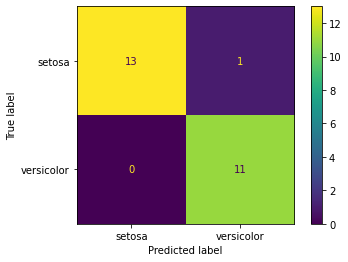

In [ ]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
plot_confusion_matrix(knn, xtest, ytest, display_labels=iris.target_names);

3- show performance metric values

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(ytest, ytest_pred))

              precision    recall  f1-score   support

           1       1.00      0.93      0.96        14
           2       0.92      1.00      0.96        11

    accuracy                           0.96        25
   macro avg       0.96      0.96      0.96        25
weighted avg       0.96      0.96      0.96        25



## Regression metrics

* We cannot calculate accuracy for a regression model.
* The skill or performance of a regression model must be reported as an error
* **Basic metrics:** Given a regression model $f$, the following metrics are commonly used to assess the performance of the model:

  *  **Total sum of squares**: variation of the values of a dependent variable from the sample mean of the dependent variable.
  * **Explained sum of sequares**: describes how well a regression model represents the modeled data. Higher sum indicates not fitting the data well.
  * **Residual sum of sequares**: measures the variation of modeling errors at low level.Lower sum indicates  better data explainability.

  <img src="https://i.ibb.co/MV65Xg2/regression-metrics-1.png" />
* **Coefficient of determination**: The coefficient of determination, often noted $R^2$ provides a measure of how well the observed outcomes are replicated by the model and is defined as:
$R^2 = 1 - \frac{SS_{res}}{SS_{tot}}$
* **Main metrics**:
  * The following metrics are commonly used to assess the performance of regression models.
  *They consider the number of variables $n$ that they take into account.
<img src="https://i.ibb.co/QcN2rTx/regression-metrics-2.png" />

  where $L$ is the likelihood, $m$ is the number of observations, and $\widehat{\sigma}^2$ is an estimate of the variance associated with each response (i.e., residual mean error, estimated by MSE).


**Mallow's Cp** is generally used for model selection to pick up the model with best perfroamnce, The Akaike information criterion (**AIC**) and the Bayesian information criterion (**BIC**) provide measures of model performance that account for model complexity. Adjusted $R^2$ decreases if we add useless variables to the model and vice versa.

## Model selection

* To finally evaluate a model, we usually need three different parts of the data that we have as follows:

<center>

| Training set | Validation set | Test set |
| --- | :---: | ---: |
| Used to train the model  | Used to assess the model | Unseen data |
| Usually the bigest part (70% or more) | Usually 20% | Evlaute the model with |

</center>

* Once the model is chosen, it is trained on the entire dataset and tested on the unseen test set.
<img src="https://i.ibb.co/p1xkxZS/train-test.png" />

**Cross-validation**:
* a method that used to select a model that does not rely too much on the initial training set.
* The different types are summed up in the table below:

<center>

| K-fold | Leave-p-out|
| :---: | :---: |
| split the data into k no-overlapping sub-parts (folds)  | choose a value $p 𝛜 [1..n-1]$ |
| Training on $k−1$ folds and assessment on the remaining one | Training on $n-p$ observations and assessment on the $p$ remaining ones |
| Generally $k=5$ or $10$ | Case $p=1$ is called leave-one-out |

</center>

In both cases, The error is then averaged over the k folds/parts and is named cross-validation error.

<center>
<img height=300 src="https://miro.medium.com/max/1400/1*AAwIlHM8TpAVe4l2FihNUQ.png" />
</center>

**Diagnostics:**

It is worth mentioning that high precision or accuracy or any other metric does not necessarily reflect the true performance of the model. Instead, it might be reflecting a status of overfitting. To get more insights about overfitting, it is fundamental to understand the role of variance and bias in overfitting:

* **Bias**: the difference between the expected prediction and the correct model(generally the difference between the average prediction and the target value).


* **Variance**: the variability of the model prediction for given data points.

The relationship between Bias/variance can be summarized as follows: The simpler the model, the higher the bias, and the more complex the model, the higher the variance.


<center>

<img height="300" src="https://editor.analyticsvidhya.com/uploads/20790High%20Bias.gif" ></img>

<center/>

The following table gives real cases of undefitting and overffiting and some possible remedies of the situations.
<img width="80%" src="https://i.ibb.co/kgFjwxJ/over-underfitting.png" />

**Regularization:**
* The regularization procedure aims at avoiding the model to overfit the data and thus deals with high variance issues.
* reduce variance at the cost of introducing some bias.
* decreasing the model variability decrease the model complexity, that is the number of predictors.
* This is done by penalizing predictors (settings their coefficients to $≃ 0$) if they are too far from zero, thus enforcing them to be close or equal to zero.

The following table sums up the different types of commonly used regularization techniques:
<img src ="https://i.ibb.co/RPPc0zg/regularization-2.png" />


More details about regularization can be found [here](https://towardsdatascience.com/regularization-an-important-concept-in-machine-learning-5891628907ea#:~:text=The%20word%20regularize%20means%20to,training%20set%20and%20avoid%20overfitting.)

**Example:**

In the following example, we will see how regularization may dramatically increase the regression performance.

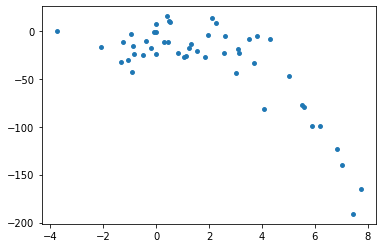

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def generate_dataset(B, n):
    e = np.random.normal(-15, 15, n)
    X = 2 - 3 * np.random.normal(0, 1, n)
    y = 0
    for i in range(len(B)):
        y += B[i] * X**i
    y += e
    return X, y

B = [0.1, 0.2, 0.3, -0.4]    # [beta0, beta1, beta2, beta3]
X, y = generate_dataset(B, 50)
plt.scatter(X, y, s=15)

In [ ]:
# Building and fitting the Linear Regression model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

X, y = generate_dataset(B, 50)

#Generate new test data
X2, y2 = generate_dataset(B, 20)

poly = PolynomialFeatures(degree=8, include_bias=False)
poly2 = PolynomialFeatures(degree=16, include_bias=False)


poly_features = poly.fit_transform(X.reshape(-1, 1))
poly_features2 = poly.fit_transform(X2.reshape(-1, 1))

linearModel = LinearRegression()
linearModel.fit(poly_features, y)

# Evaluating the Linear Regression model
print(linearModel.score(poly_features2, y2))

0.6364593734835868


In [ ]:
from sklearn.linear_model import Ridge


# List to maintain the different cross-validation scores
cross_val_scores_ridge = []

# List to maintain the different values of alpha
alpha = []

# Loop to compute the different values of cross-validation scores
for i in range(1, 9):
    ridgeModel = Ridge(alpha = i * 40)
    ridgeModel.fit(poly_features, y)
    score = ridgeModel.score( poly_features2, y2)
    # avg_cross_val_score = mean(scores)*100
    cross_val_scores_ridge.append(score)
    alpha.append(i * 200)

# Loop to print the different values of cross-validation scores
for i in range(0, len(alpha)):
    print(str(alpha[i])+' : '+str(cross_val_scores_ridge[i]))

200 : 0.6653968262887501
400 : 0.6711444170343008
600 : 0.673506823781417
800 : 0.6746800126019875
1000 : 0.6753051013366153
1200 : 0.6756383882406153
1400 : 0.6758019669489553
1600 : 0.6758609933584792


# Decision Theory: Generative and Discriminative Models


##Definitions

**Informally**:

* Generative models can generate new data instances.
* Discriminative models discriminate between different kinds of data instances.

A generative model could generate new photos of animals that look like real animals, while a discriminative model could tell a dog from a cat.

If the task is to determine the language that someone is speaking:
*  Generative approach:– is to learn each language and determine as to which language the speech belongs to
*  Discriminative approach:– is determine the linguistic differences without learning any language– a much easier task!


**Formally**: given a set of data instances $X$ and a set of labels $Y$:

* Generative models capture the joint probability $p(X, Y)$, or just $p(X)$ if there are no labels.
* Discriminative models capture the conditional probability $p(Y | X)$.

**Example:**
* Suppose we have the following data in the form `(x,y): (1,0), (1,0), (2,0), (2, 1)`,

then $p(x,y)$ is:

|     | y=0 | y=1|
|---  | :---: | :---: |
|x = 1| 1/2 | 0|
|x = 2| 1/4 | 1/4|    

$p(y|x)$ is

|     | y=0 | y=1|
|---  | :---: | :---: |
|x = 1| 1 | 0|
|x = 2| 1/2 | 1/2|

* The distribution $p(y|x)$ is the natural distribution for classifying a given example $x$ into a class $y$ (discriminative)
* $p(x,y)$ (Genrative) can be transformed into $p(y|x)$ by applying Bayes rule and then used for classification: $p(x,y) = p(x)p(y|x)$

The differences between Discriminative and Generative are summarized in the following table:

<style>
td {
  font-size: 50px
}
</style>

|Generative|Discriminative|
|:--|:--|
|Models classes via pdfs and prior probabilities| Directly estimate posterior probabilities with no attempt to model underlying probability distributions|
|Can generate synthetic data points|Dedicated to classify new data which grants better performance|
 | a full probabilistic model of all variables |provides a model only for the target variables that we want to predict|
|Hard to estimate distributions accurately|Easier tot une|
|Popular models: Gaussians, Naïve Bayes, Mixtures of multinomials, Mixtures of Gaussians,etc.|Logistic regression, SVMs, neural networks, Nearest neighbor, etc|

* It’s important to remember that we rarely know precisely the value of any of the probabilities.
*There is usually error in all of these probabilities.
* In practice, generative models are most popular when we have phenomena that are well approximated by the normal distribution, and we have a lot of sample points, so
we can approximate the shape of the distribution well.

## The three ways to build classefiers

Classifiers can be characterized by a PDFs and priors, posteriors, or neither.

1. **Generative models** (e.g., LDA)
  * Assume sample points come from probability distributions, different for each class.
  * Guess form of distributions
  * For each class $C$, fit distribution parameters to  $C$ points, giving $f(X|Y=C)$ [**lhood**]
  * For each class $C$, estimate $P(Y=C)$ [**prior**]
  * Bayes’ Theorem gives  $P(Y|X)$
  * pick class $C$ that maximizes $P(Y=C|X=x)$ [**posterior probability**]
(equivalently, maximizes $P(X=x|Y=C)P(Y=C)$ )

2. **Discriminative models** (e.g., logistic regression)
  * Model $P(Y|X)$ directly
3. **Find decision boundary** (e.g., SVM)
  * model $r(x)$ directly (no posterior)


* Advantage of (1 & 2): $P(Y|X)$ tells the probability the guess is wrong
[This is something SVMs don’t do.]
* Advantage of (1): you can diagnose outliers:$P(X)$ is very small
* Disadvantages of (1): often hard to estimate distributions accurately; real distributions rarely match standard ones.

## Gaussian Discriminant Analysis ( QDA and LDA)

<img width=600 src="https://yintingchou.com/posts/2017-03-13-lda-and-qda/ldaqda_1.png" />



1. Gaussian Discriminant Analysis is a generative techniques that requires a fundamental assumption which is "***each class comes from normal distribution (Gaussian)***"
<c>
$X \hookrightarrow  \mathcal{N}(\mu,\,\sigma^{2}) : f(x) = \frac{1}{{(\sqrt{2 \pi} \, \sigma})^d} e^{- (x - \mu)^2 / (2 \sigma^2)},
   \qquad - \infty < x < \infty.$, $µ,x=vectors; σ=scalar;d=dimension$
<c/>

2. For each class $C$,  we estimate mean $µ_C$, variance $σ_c^2$, and prior $π_C=P(Y=C)$.

3. Given $x$, Bayes decision ruler $r^*(x)$ predicts class $C$ that maximizes $f_C(x) = f(X=x|Y=C)π_C$.

4. $ln(w)$ is monotonically increasing function for $w>0$, so the former is equivalent to maximize:
<img height="60" src ="https://i.ibb.co/BsRnngq/equation.png" />

In a 2-class problem, we can incorporate an asymmetrical loss function instead of the prio $\pi_C$. In a multi-class problem, it gets more difficult.

### Quadratic Discriminant Analysis(QDA)

* For simplicity, let's supose that we have two classes $C_1$ and $C_2$, then pick the class with the biggest posterior probability:
$r^*(x) = \begin{cases}
    C_1 \ if \ Q_{C_1}(x) - Q_{C_2}(x)>0 \\
    C_2, \ otherwise
\end{cases}$
* The decision function is quadratic. Bayes decision boundary is $Q_{C_1}(x) - Q_{C_2}(x) = 0$.

<center>
<img src="https://i.ibb.co/YbjzBHC/QDA-1.png" />
<center/>


* So far, we worket on Gaussian distribution where $x$, $µ$ and $σ$ are scalars.
* Such scalars applies equally well to a multi-dimensional
* In cas of anisotropic Gaussian distributions, the
variance becomes a vector describing the variability on each direction.
* One should know that QDA works very naturally with more than 2 classes. The feature space gets partitioned into regions.
<center>
<img width=400 src="https://i.ibb.co/qrNrDx6/QDA-2.png"></img>

<center/>

* One might not be satisfied with just knowing how each point is classified.
* One of the great things about QDA is that it allows to determine the probability that a classification is correct.
* To recover posterior probabilities in 2-class case, use Bayes:
<img src="https://i.ibb.co/TKjyN1h/QDA-3.png" />

### Linear Discriminant Analysis(LDA)

* LDA is a variant of QDA with linear decision boundaries.
* It’s less likely to overfit than QDA.
* The fundamental assumptionis that all the Gaussians have same variance $σ^2$
* The equations simplify nicely in this case.
 $QC1(x)−QC2(x) = \frac{(μ_{C_1} - μ_{C_2})x}{σ^2} - \frac{(||μ_{C_1}||^2 - ||μ_{C_2}||^2)}{2σ^2} + lnπ_{C_1} - lnπ_{C_2}$
* You should know that the quadratic terms in $Q_{C_1}$ and $Q_{C_2}$ canceled each other out.
* Now, we obtain a linear classifier for which Choosing a $C$ that maximizes the following linear discriminant function, which works for any number of classes:
$\frac{μ_C.x}{σ^2} - \frac{(||μ_C||^2)}{2σ^2} + ln π_{C}$
* In case of 2 classes, the decision boundary is $w· x+ α=0$ and the
posterior is $P(Y=C|X=x)=s(Q_{C_1}(x) - Q_{C_2}(x))$
<img width="80%" src="https://i.ibb.co/hZxJQL3/LDA-1.png" />
* The logistic function is the right Gaussian divided by the sum of the Gaussians.
* notice that even if the Gaussians are 2D, the logistic  still looks 1D.
* In case of more than two classes, their LDA decision boundaries form a classical Voronoi diagramif the priors $\pi_C$ are equal.
* In such case, all the Gaussians have the same width.

  <img src="https://i.ibb.co/K03sbHj/LDA-2.png" />

### Likelihood of a Gaussian: A reminder

* We have already seen in ML 1 how to tune the likelihood of some function including Normal.
* Given sample points $X1,X2,...,Xn$, let's find best-fit Gaussian.
* If we generate a random point from a normal distribution, what is the probability that it will be exactly at $X_1$?
* Regardless the answer, we’re going to  do “likelihood” anyway.]
* Likelihood of generating these points is
$L(µ,σ;X_1,...,X_n)=f(X_1)f(X_2)···f(X_n)$ which needs to be maximized $\Leftrightarrow$ maximizing log likelihood.

  <img height="90" src="https://i.ibb.co/dgHfkyX/likelihood.png" />

* By partially derive the equation along the desired variables, we obtain:

  <img height="110" src="https://i.ibb.co/KzhcjSZ/equation-2.png" />

##Regression: Least-Squares Linear and Logistic Regression

As we have learned before:
* Classification tends to  predict a class (discrete) for a given point $x$, whereas, regression predicts some numerical value (continuous) of a point $x$
* QDA and LDA don’t just perform classification; But also estimates the probability that a a given label for a sample $x$ is correct, which means that they implicitly do regression.
* To perform regression we:
  1. Choose a form of regression function (hypothesis) $h(x;p)$ with parameter(s) $p$. as instance, a decision function in classification; e.g., *linear, quadratic, logistic in $x$*]
  2. Choose a cost function (objective function) to optimize, usually based on a loss function; e.g., *risk=expected loss*
* Some regression functions:
  * (1). linear:$h(x;w,α)=w· x+ α$
  * (2). polynomial
  * (3). logistic:$h(x;w,α)=s(w· x+α)$. recall that the logistic function is $s(𝛾)= \frac{1}{1 + e^{-𝛾}}$

**Logistic expression**
* The logistic function is an interesting choice.
* recall that LDA produces a posterior probability function with such expression $P(Y=C|X=x)=s(Q_{C_1}(x) - Q_{C_2}(x))$.
* So the logistic function seems to be a natural form for modeling certain probabilities.
* If we want to model posterior probabilities, sometimes we use LDA.
* Alternatively, we could skip fitting Gaussians
to points, and instead just try to directly fit a logistic function to a set of probabilities.

**Some loss functions**: let $z$ be the prediction of $h(x)$ and $y$ be the true label.
  * (A) $L(z,y)=(z - y)^2$: squared error
  * (B) $L(z,y)=|z-y|$: absolute error
  * (C) $L(z,y)=-y\ ln\ z-(1-y)\ ln(1-z)$: logistic loss, aka cross-entropy, $y \in \{0,1\},z \in[0,1]$

**Some cost function to minimize:**
* (a). $ J(h)=\frac{1}{n} \sum_{i=1}^{n}L(h(x_i),y_i)$: mean loss. Leave out the $\frac{1}{n}$ for sum loss .
* (b). $ J(h)= max_{i=1}^n L(h(x_i),y_i)$:  maximum loss.
* (c). $ J(h)= \sum_{i=1}^{n}ω_i L(h(x_i),y_i)$: weighted sum , which regards some points as more important than others.
* (d). $J(h)=(a), (b), or\ (c)+ λw^2$:  $l_2$ penalized/regularized cost or Ridge
* (e). $J(h)=(a), (b), or\ (c)+ λ|w|$:  $l_1$ penalized/regularized cost or Lasso

By combining regression function + Loss function + Cost function we get a regreeion model(method) ready to fit the data. Some famous regression methods:

|Regression mehod| parts|Description|
|:---|:--:|:--|
|Least-squares linear regression.| (1)+(A)+(a)|quadratic cost; minimize w/calculus
| Weighted Least-squares linear regression| (1)+(A)+(c)|quadratic cost; minimize w/calculus
| Ridge regression| (1)+(A)+(d)|quadratic cost; minimize w/calculus|
| Lasso regression| (1)+(A)+(e)|quadratic program
| Logistic regression.| (3)+(C)+(a)|convex cost; minimize w/gradient descent
| Least absolute deviations| (1)+(B)+(a)|linear program
| Chebyshev criterion| (1)+(B)+(b)|linear program

The optimization algorithm and its speed depend crucially on which parts the regression method is composed of.

###Least-Squares Linear Regression

* Least-Squares Linear Regression is acombination of Linear regression function (1)+ squared loss function (A)  +cost function (a)
* So, the final cost function needs to be tunes we be:
   $ J(h)=\frac{1}{n} \sum_{i=1}^{n}(x_i.w+α − y_i)^2$

  <img height= 250 src="https://i.ibb.co/sC3fkB9/linear-regression.png" />

* If we know that $ x·w+ α$ can be writen as $x'. w'$ where $x'$ is the vector $x$ with additionl cell of value 1, and $w'$ is the vector $w$ with additional cell of value $\alpha$.
 $$\begin{bmatrix} x_1 &....x_n & 1 \end{bmatrix} \begin{bmatrix} w1_1\\ .. \\w_n\\ α \end{bmatrix}$$
* Now the objective function becomes $\hat{RSS}(w)
 = min_w ||X'.w - y||^2$, for residual sum of squares

  * to minimize $RSS(w) = w^TX'^TX'w - 2y^TX'w+y^Ty$
  * we set $ \triangledown RSS = 2X'^T Xw - 2X'^Ty=0$
  * this implies $ w=(X'^TX')^{-1}X'^Ty$



**pros:**

* Easy to compute; just solve a linear system.
* Unique and stable solution.

**cons:**
* Very sensitive to outliers, because errors are squared!
* Fails if $X^TX $ is singular, which means that the problem   has multiple solutions(unconstrained).

### Logistic Regression
* Logistic regression function (3)+logistic loss function (C)+cost function (a).
* Fits “probabilities” in range (0,1)
* Usually used for classification. $y_i$'s can be probabilities, but in most applications they’re all 0 or 1.
* Although both utilize Logistic function, QDA and LDA are **generative** models, whereas, Logistic Regression is a **discriminative** one.
* With LDA, we have seen that in classification, the posterior probabilities are often modeled well by a logistic function.
*The question rises, ***why not just fit a logistic function directly to the data, skipping the Gaussians?***

Supose that we have a data matrix $X$ and $w$ including the fictitious dimension(i.e., vector of ones and $\alpha$ are $X$'s and $w$’s last components respectively.
* Then, we need to find out what maximizes the following:

 $ J(w)=\frac{1}{n} \sum_{i=1}^{n}L(s(x_i.w),y_i) = -\sum_{i=1}^{n} [ y_i\ ln\ (x_i.w) + (1-y_i)\ ln(1-(x_i.w))]$

So, let's plot the loss $L(z,y)$ for $y=0$  and $y=0.7$ .



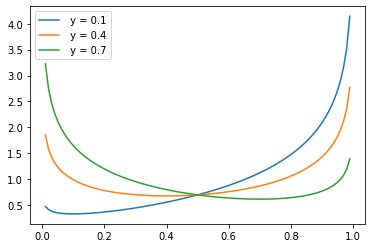

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

#L(z,y)=−y ln z−(1−y) ln(1−z)
def L(z, y):
  return -y * np.log(z) - (1-y)*np.log(1-z)

z = np.arange(0.01, 1, 0.01)
L0 = L(z, 0.1); L04 = L(z, 0.4); L07 = L(z, 0.7)
plt.plot(z, L0, label= ' y = 0.1'), plt.plot(z, L04, label= ' y = 0.4'), plt.plot(z, L07, label= ' y = 0.7')
plt.legend();

* As expected, each function is minimized at its corresponding $y$ value, while loss functions are always convex.
* Since J(w) is always convex, it can be minimized by gradient descent.
* To perform gradient descent, we need to compute  derivatives.

  <img height = 80 src="https://i.ibb.co/f4k68s9/derivative-sigmoid.png" />

  <img src ="https://i.ibb.co/7gqXsy4/derivative-sigmoid-2.png" />

* $Let\ s_i =s(x_i·w)$

  <img height = 220 src="https://i.ibb.co/Tq3Yt4H/derivative-sigmoid-3.png" />

To update weights $w$, we may resort to:
* Gradient descent rule: $w_{i+1} = w_{i}+ ϵ.X^T (y - s(Xw))$
* or, Stochastic gradient descent: $w_{i+1} = w_{i}+ ϵ.X_i^T (y_i - s(X_iw))$. Shuffle points in random order, process one by one. used with very large n, and sometimes it converges before visiting all points!
* The last technique looks a lot like the perceptron learning rule. The only difference is that the $s_i$ part.
* It should be mentioned that logistic regression separates linearly separable points.

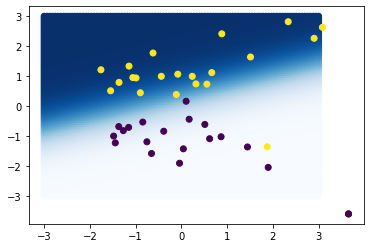

In [ ]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

data, classes = make_classification(n_classes= 2, n_samples =40, n_clusters_per_class=1,  n_features = 2, n_redundant=0)
plt.scatter(data[:,0], data[:,1], c=classes)

clf = LogisticRegression(random_state=0).fit(X, y)

#plot the decision as a surface
Blues = plt.get_cmap('Blues')
clf.predict(np.array([3,0])[np.newaxis, :])
X, Y = np.meshgrid(np.linspace(-3,3,100),np.linspace(-3,3,100))
positions = np.vstack([X.ravel(), Y.ravel()])
positions.transpose().shape
crs = clf.predict_proba(positions.transpose())
plt.scatter(positions[0], positions[1], c = Blues(crs[:,0]), alpha=1)

#plot the points
plt.scatter(data[:,0], data[:,1], c=classes)

* A 2018 paper by Soudry et al. shows that gradient descent applied to logistic regression eventually converges to the maximum margin classifier
* However, the convergence will be extremely slow.
* In practice, logistic regression will usually find a linear separator reasonably quickly.
* but it’s not a practical algorithm for maximizing the margin in a reasonable amount of time

### Shrinkage: Ridge and Lasso, and Subset Selection,

* In statistics, shrinkage is the reduction in the effects of sampling variation.
* This idea is complementary to overfitting.
* Shrinkage (also known as regularization) has the effect of reducing variance and can also perform variable selection.


**Ridge Regression (Tikhonov Regularization):**

<img src ="https://media-exp1.licdn.com/dms/image/C5112AQHTZ2pmlLIynQ/article-inline_image-shrink_1000_1488/0/1572412887028?e=1671667200&v=beta&t=h5OH0r5_XbIlZw9eHWVws_KnnH4fGrQ4V9VBvieePlg" />

* We have seen earlier that $(1)+(A)+ (d)$ gives us the $l_2$ penalized/regularized cost or Ridge:
  
   $ \underset{w}{\operatorname{ argmin}} J(h)= ||Xw - y||^2 + λ||w'||^2$
  
   where $w'$ is the vector $w$ with the last component $\alpha$ replaced by 0. Althought the matrix $X$ has a fictitious dimension, we DON’T penalize $α$.
* You clearly notice that we add a regularization term (i.e., penalty term) for shrinkage  to encourage small $||w'||$, Why?

  * Guarantees that the normal system has always a unique solution.
  * Standard least-squares, in the other hand,  yields singular normal equations (infinite number of solutions) when the sample points lie
on a common hyperplane in feature space. E.g., when $d>n$.
<center>
<img src="https://i.ibb.co/S3N2zH9/ridge.png" />
<center />

* The left plot of the above figure presents the quadratic form for a  semidefinite cost function associated with least-squares
regression.
* You may notice that it has infinite number of minimas.
* In such cases, the regression problem is said to be ill-posed.
*To obtain a positive definite quadratic form (right image), which has a unique minimum we add small penalty term.
* The term ***“regularization”*** implies that we are turning an ill-posed problem into a
well-posed problem.

**How is it important in machine learning?**
* To reduce overfiting we need to reduce the variance.
* Assume that for a given data $X$, we found out that $500_{x_1} + 0.5_{x_2}$ is the best fit for well-separated points with $y_i ∈{0,1}$.
* We can clearly see that, based on the big coefficients/wieghts, small changes in $x_1$  cause big change in $y$ which is surely a sure sign of overfitting.
* When having large variance(overfitting), it implies that the problem is likely **ill-posed**, even though technically it might be **well-posed**.
* The solution to such a problem is by penalizing large weights and therefore reducing the variance.



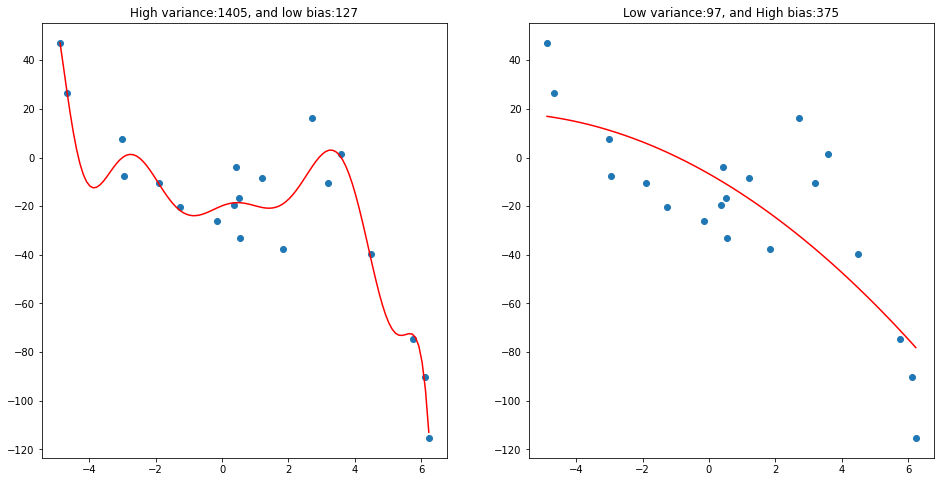

In [ ]:
# Building and fitting the Linear Regression model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
#Generate new test data
# X, y = generate_dataset(B, 20)

poly = PolynomialFeatures(degree=12, include_bias=False)
poly2 = PolynomialFeatures(degree=2, include_bias=False)

poly_features = poly.fit_transform(X.reshape(-1, 1))
poly_features2 = poly2.fit_transform(X.reshape(-1, 1))


linearModel = LinearRegression()
linearModel.fit(poly_features, y)

# plot data and regression result
plt.figure(figsize=[16,8])
plt.subplot(1, 2, 1)
plt.scatter(X,y )
x  = np.arange(X.min(), X.max(), 0.1)
y_x = [np.power(a, np.arange(1, len(linearModel.coef_) + 1)).dot(linearModel.coef_)  + linearModel.intercept_ for a in x]
# print('multinomial_12:', linearModel.coef_)
plt.plot(x, y_x, c ='r');

var = int((np.diff(y_x)**2).sum())
bias = np.abs(y - [np.power(a, np.arange(1, len(linearModel.coef_) + 1)).dot(linearModel.coef_)  + linearModel.intercept_ for a in X]).sum()
plt.title("High variance:" + str(var) + ', and low bias:' + str (int(bias)));

linearModel = LinearRegression()
linearModel.fit(poly_features2, y)

plt.subplot(1, 2, 2)
# print('multinomial_2:', linearModel.coef_)
plt.scatter(X,y )
x  = np.arange(X.min(), X.max(), 0.1)
y_x = [np.power(a, np.arange(1, len(linearModel.coef_) + 1)).dot(linearModel.coef_)  + linearModel.intercept_ for a in x]
plt.plot(x,  y_x, c ='r');
var = int((np.diff(y_x)**2).sum())
bias = np.abs(y - [np.power(a, np.arange(1, len(linearModel.coef_) + 1)).dot(linearModel.coef_)  + linearModel.intercept_ for a in X]).sum()
plt.title("Low variance:" + str(var) + ', and High bias:' + str (int(bias)));


* In the following plot of weight space $\{β\}$. $\hat{β}$, read as $\hat{w}$, is the least-squares solution.

  <img height=400 src="https://www.researchgate.net/publication/361861872/figure/fig2/AS:1176551332810763@1657523105797/Geometric-explanation-of-lasso-and-ridge-regression.jpg" />

* The red ellipses are the isocontours of $||Xw - y||^2$.
* The isocontours of $ ||w'||^2 $ are circles centered at the origin (blue).
* The solution to the normal system lies where a red isocontour just touches a blue isocontour.
* As $λ$ increases, the solution will occur at a more
outer red isocontour and a more inner blue isocontour.
* This process helps to reduce overfitting.

**Variance and bias tradeoff**
* To solve minimize the cost function, we set  $ \triangledown J=0 $ gives normal equations: $(X^TX+ λI')w = X^Ty$
* $I'$ here refers to the  identity matrix where the bottom right is set to zero. We do this to avoid penalizing the bias term $α$.
* Algorithm:
    * Solve for $w$.
    * Increase $\lambda$ for more regularization and smaller $||w'||$
    * Tune the variance/bias of Ridge regression $Var(β_{ridge}) = σ^2 ( X^TX + λ I')^{− 1} X^T e$,  where $e$ is the noise (our data model by $y=Xv+e$).
    * As $λ → ∞$, variance $→$ 0 and bias increases.
  <img src="https://i.ibb.co/6XRHRC6/ridge-2.png" />

* The error function Err(x) is the sum of $Bias²$, $variance$ and the irreducible error $\sigma^2$. $Err(x) = Bias^2 + Var(β_{ridge}) + \sigma^2$
* For the bias-variance trade-of, the test error as a function of $\lambda$ is a U-shaped curve. We find the
bottom by cross-validation.
* Ideally, features should be “normalized” to have same variance.
* To use asymmetric penalty, The identity matrix $I'$ must be replaced with another diagonal matrix.

For **Lasso Regression**, The cost function engages a $l_1$ least absolute shrinkage and selection operator.
$$ $ \underset{w}{\operatorname{ argmin}} J(h)= ||Xw - y||^2 + λ||w'||$$

# Learning paradigms: supervised, unsupervised, and semi-supervised.

## Brief reminder
* ML can be applied to almost any problem.
* it has been used to detect cancer, predict traffic patterns, match people up, recognize faces (and facial expressions), caption images, and much, much more.
* Depending on the problem at hand, different machine learning techniques are used to yield an effective solution.
* The four main paradigms in machine learning include **supervised, unsupervised, semi-supervised reinforcement learning**.

**Supervised Machine Learning**
* The majority of practical machine learning uses supervised learning.

* It is when using algorithm to learn the mapping function $f(X) = y$ from the input $X$ to the output $y$, where $X$ and $y$ are known beforehand.
* Called supervised because of learning from the training dataset can be thought of as a teacher supervising the learning process.
*  Learning stops when the algorithm achieves an acceptable level of performance (low error rate).

**Unsupervised Machine Learning**
*  when only having input data $X$ and no corresponding output variables.
* The goal is to model the underlying structure(i.e.,  distribution) of the data in order to learn more about the data itself.
* Called unsupervised learning because there is no correct answers and therefor no teacher.

**Semi-Supervised Machine Learning**
* When the large amount of input data $X$ incorporated with few labeled $y$.
* Many real world machine learning problems fall into this area.
* This is because it is expensive and time-consuming to label large amount of data as it may require domain experts.
* On the other hand, unlabeled data is cheap and easy to collect/store.
* Both supervised and unsupervised techniques can be utilized.
  1. unsupervised techniques discover and learn the structure of the data.
  2. supervised techniques make best guess predictions for the unlabeled data, feed that data back into the supervised learning algorithm as training data.
  3. use the final model to make predictions on new unseen data.

**Reinforcement Learning**
* training of machine learning models to make a sequence of decisions.
* The agent learns to achieve a goal in an uncertain,
* It employs trial and error (rewards or penalties) to come up with a solution to the problem.
* The goal is to maximize the total reward.
* Although the reward policy are beforehand set, the model given no hints or suggestions for how to solve the problem.
* It’s up to the model to figure out how to perform the task to maximize the reward, starting from totally random trials and finishing with sophisticated tactics and superhuman skills.

##Unsupervised Learning and Principal Components Analysis

* In unsupervised learning, we have sample points, but no labels/classes and nothing to predict. The goal is to discover the structure within the data.
* Some examples can be found in:
  * **Clustering**: partition data into groups of similar/nearby points.
  * **Dimensionality reduction**: data often lies near a low-dimensional subspace (or manifold) in feature
space; a matrix that models the data has a low-rank approximations.
  * **Density estimation**: is the task of fiting a continuous distribution to discrete data. e.g., when fitting Gaussians to sample points, that’s density estimation.

**Principal Components Analysis**

The main goal to find $k$ directions that capture most of the variation of sample point $X \in ℝ^d$, where $k<<d$.
<img height=200 src ="https://i.ibb.co/RPhX7M5/pca1.png" />

**Why?..**
* Reducing dimensions makes computations cheaper, e.g., regression.
* Somtimes used to reduce overfitting in learning algorithms by removing irrelevant dimensions.
* Finding a small basis for representing variations in complex things, e.g., faces, genes.

Let $X$ be $n\times d$ design matrix as the table above ($5 \times 4$) shows, what do you notice?

||Math|Physics|English|French|
|---|---|---|---|---|
|Khaled|12|13|11|14
|Manar|8|8.5|10|13
|Fateh|12|13|9|14
|Saif|16|16|8.5|13
|Ines|8|8.5|10|12

* The above table (matrix) contains $5$ rows (samples) and $4$ columns (variables).
* The fourth sample as instance $x_4 = [16, 16, 12.5, 13]$
* The second varible is $y_2 = [12, 8.5, 14, 16, 9.5]$
* The mean of the designe matrix is $μ_x = [11.7, 12.2,  9.8, 13.3]$ and it represents the center of each variable.

  $\mu_j=\frac{1}{n} \sum_{i=1}^{n}x_{ij}$

In [ ]:
import numpy as np
X = np.array([[12, 13, 11, 14],[8, 8.5, 10, 13],[12, 13, 9, 14],[16, 16,8.5, 13],[8, 8.5, 10, 12]])
X.mean(axis=0)

array([11.2, 11.8,  9.7, 13.2])

* The centerd data is the matrix $\tilde{X}$ where  $\tilde{X}_{ij} = x_{ij} - \mu_j$ for $i = 1..n, j = 1..d$
* Caculate the sum of each column of $\tilde{X}$, what do you conclude?

In [ ]:
X_hat = X - X.mean(axis=0)
print(X_hat)

[[ 0.8  1.2  1.3  0.8]
 [-3.2 -3.3  0.3 -0.2]
 [ 0.8  1.2 -0.7  0.8]
 [ 4.8  4.2 -1.2 -0.2]
 [-3.2 -3.3  0.3 -1.2]]


* All the forthcoming calculation is done using the centered matrix $\tilde{X}$. $X$ is needed no more.
* Let $w$ be a unit vector. The orthogonal projection of the point $x$ on to vector $w$ is $\tilde{x}=\frac{(x·w)}{||w||}.\frac{w}{||w||} = (x.w).w$ (if $w$ is unit)
* Unit vectors are of use when length is not relevant.

  <img height=100 src ="https://i.ibb.co/vhwVk9X/pca2.png" />

* The idea of PCA is that we pick the best direction $w$, then project all the data onto $w$ so we can
analyze it in a one-dimensional space.

* Indeed, if we project from $d$ dimensions to just one, we lose a lot of information.
* Therfore,  we pick several directions instead of one.
* Those directions span a subspace, and we
want to project points orthogonally onto the subspace.
* This would be an easy task if the directions are orthogonal (orthonormal) to each other with length of 1.
* Given orthonormal directions $v_1,...,v_k,\tilde{x}= \sum_{i=1}^{k}(x·vi)vi$

  <img height = 130 src ="https://i.ibb.co/fp4c8SS/pca3.png" />
* Usualy, we want a $k$ principal coordinates ($k < d$), we don’t want to project points back to $ℝ^d$



**How it works**
* $X^TX$ is square, symmetric, positive semi-definite, $d \times d$ matrix.
* As it’s symmetric, its eigenvalues are real and its eigenvectors are orthogonal to each other. [proofs here](chrome-extension://oemmndcbldboiebfnladdacbdfmadadm/http://www.quandt.com/papers/basicmatrixtheorems.pdf)
* Let $0 ≤ \lambda_1 ≤\lambda_2 ≤...≤\lambda_d$ be its eigenvalues sorted.
* Let $v_1,v_2,...,v_d$ be the corresponding orthogonal unit eigenvectors ( principal components).
* Then, the most important principal components will be the ones with the greatest eigenvalues.


##PCA derivation (1)##

The first version of PCA performs the following:
1. Fit a Gaussian to data with maximum likelihood estimation.
2. Choose $k$ Gaussian axes of greatest variance.

<img src="https://i.ibb.co/8r73V1X/pca4.png" />



In [ ]:
r

* Using the MLE, we are assuming that data are independently sampled from a multivariate normal distribution with mean vector  and variance-covariance matrix  $\hat{∑} = \frac{1}{n}X^TX$
* The PCA Algorthm is as follow:
  1. Center $X$
  2. Normalize $X$ [Optional]. Only if the units of measurement are different?
  3. Compute eigenvectors/eigenvalues of $\hat{∑}$:
    * using the equation  $AX=\lambda X ⇒ (A-\lambda I)X=0, $  
    * As shown in Cramer's rule, the non trivial solutions are given by $ det(A-\lambda I)=0$.
  4. Choose $k$ based on variability  the eigenvalues grants. $ \%\ of\ variability= \frac{∑_{i = d-k+1}^{d} λ_i}{∑_{i =1}^{d} λ_i}$.

  <img height=300 src="https://i.ibb.co/6swVTTL/pca5.png" />

  5.  pick eigenvectors $v_{d-k+1},...,v_d$.
  6. Compute the $k$ principal coordinates $x·vi$ of each training/test point
  7. can reverse to original space by multiplying principal coordinates by $v_i^T$

**Example:** continue with the previous centered data

variability (%):  [ 94.43097378  98.50348738  99.93198946 100.        ]


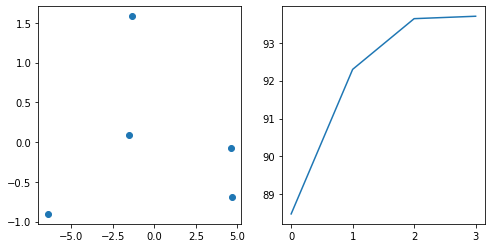

In [ ]:
# 3. Compute X'X and its eigenvectors/eigenvalues of
S = np.dot(X_hat.transpose(),  X_hat)
e_values, e_vectors = np.linalg.eig(S)
index = e_values.argsort()[::-1] # sort result
e_values = e_values[index]
e_vectors, e_vectors[:,index]
4.
# Choose  k  based on variability the eigenvalues grants
variability = np.cumsum(e_values) * 100/ np.sum(e_values)
print("variability (%): ", variability)
# pick eigenvectors  the two first eigen vectors (var = 98.5%)
v_best = e_vectors[:,0:2]
# Compute the  k  principal coordinates  x⋅vi  of each training/test point
principal_coordinate = np.dot(X_hat, v_best)

import matplotlib.pyplot as plt
plt.figure(figsize=[8,4])
plt.subplot(1, 2, 1)
plt.scatter(principal_coordinate[:,0], principal_coordinate[:,1])
plt.subplot(1, 2, 2)
plt.plot(e_values.cumsum())

In [ ]:
# back to original data
original_recovered = np.matrix(np.dot(principal_coordinate, v_best.transpose())) + X.mean(axis=0)

print('original data: \n', X)
print('\n recovered data:\n', np.around(original_recovered, 1))
print('\n MAE loss:\n', np.round(np.power(X - original_recovered,2).sum()**-1,2), "%")

original data: 
 [[12.  13.  11.  14. ]
 [ 8.   8.5 10.  13. ]
 [12.  13.   9.  14. ]
 [16.  16.   8.5 13. ]
 [ 8.   8.5 10.  12. ]]

 recovered data:
 [[11.9 13.  10.7 14.3]
 [ 7.9  8.6 10.2 12.8]
 [12.3 12.9  9.6 13.4]
 [15.9 16.1  8.3 13.2]
 [ 8.   8.4  9.7 12.4]]

 MAE loss:
 0.71 %


##PCA derivation (2)

* PCA can be performed by find a direction $w$ that maximizes sample variance of projected data.
* In other words, when the data is projected down, it must keep as maximum spread out as possible.
* So, the question is: how to choose the orientation of the support that grants the afromentioned conditions?

<img height=400 src="https://i.ibb.co/8bXg2Yn/PCA6.png" />

* Tp solve the problem above, we ressort to **Rayleigh quotient** $r(x) = \frac{x^tAx}{x^tx}$  [[details here]](https://www.cs.cmu.edu/afs/cs/academic/class/15859n-f16/Handouts/TrefethenBau/RayleighQuotient-27.pdf).
* We therefore needt to solve the following:

  $\underset{w}{\operatorname{ argmax}} Var(\{ \tilde{X_1}, \tilde{X_2}, ....,\tilde{X_n}\}) = \frac{1}{n} ∑_{i=1}^{n} (X_i.\frac{w}{||w||})^2 = \frac{||Xw||^2}{n||w||^2}= \frac{w^tX^tXw}{n.w^tw}$

* If $w$ is an eigenvector $v_i$ of $X$, this means that Rayleigh quotient = $λ_i$.
* Of all eigenvectors, the above objective funtion yields $v_d$ that achieves maximum variance $λ_d/n$.
  * The question here is how to obtain a second eigen vectors?
* The solution is to pick a second direction that’s orthogonal to the best direction $v_i$, But subject to that constraint of maximizing the sample variance.
* The same goes for the third direction and so on.

## PCA derivation (3)

* The main aim is to find a direction $w$ that minimizes the *mean squared* projection distance.

  <img width = 800 src="https://i.stack.imgur.com/lNHqt.gif" />

* IT can be seen as a sort of least-squares linear regression, with one subtle but important change.
* Instead of measuring the error in a fixed vertical direction, it is measured in a direction orthogonal to the principal component direction we choose.
* In both methods, however, the goal is to minimize the sum of the squares of the projection distances.

  $\underset{w}{\operatorname{ argmin}} ∑_{i=1}^{n} ||X_i - \tilde{X_i}||^2 = ∑_{i=1}^{n} ||X_i - \frac{X_iw}{||w||^2}w||^2 = ∑_{i=1}^{n} \bigg{[}||X_i||^2 - \big{(}\frac{X_iw}{||w||}\big{)}^2\bigg{]}$
  
  which is : constant - $n$(variance from pca derivation 2).
* Minimizing mean squared projection distance means maximizing variance.
* From this point, the same reasoning as PCA derivation 2 is employed.

**Example:**

PCA can be used for various tasks including noise removal, feature extraction and data compression. In the following code, PCA has been used for image compressed. The original image has been compressed in different ratios and plots as the following:

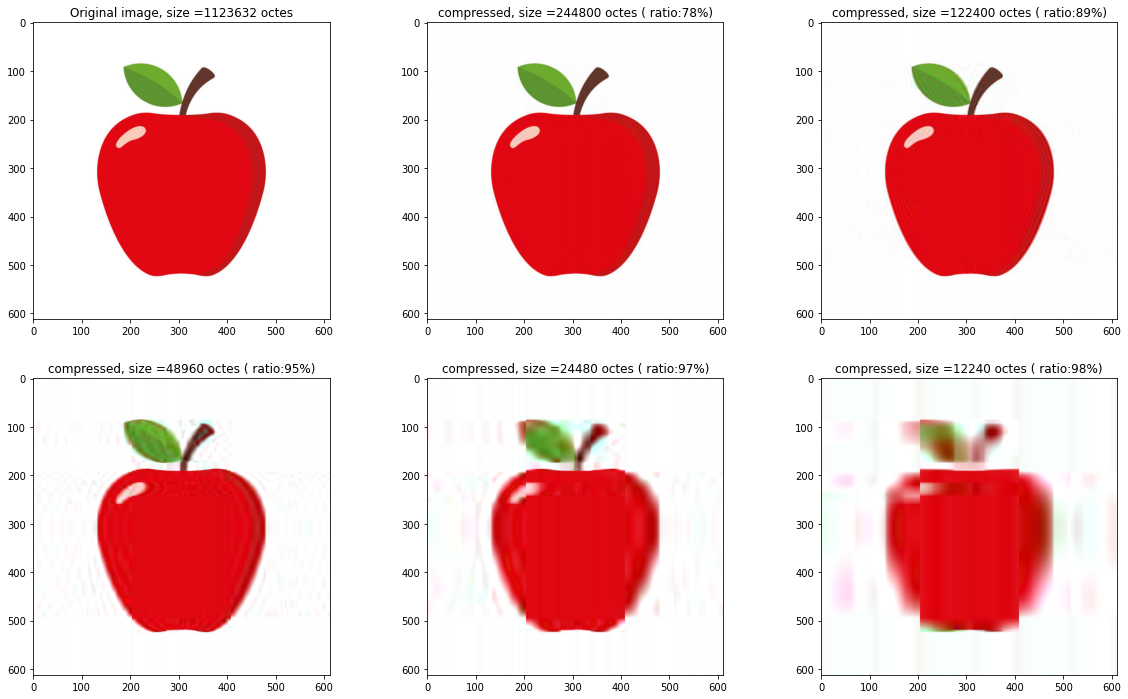

In [ ]:
# !wget "https://media.istockphoto.com/id/1141529240/vector/simple-apple-in-flat-style-vector-illustration.jpg?s=612x612&w=0&k=20&c=BTUl_6mGduAMWaGT9Tcr4X6n2IfK4M3HH-KCsr-Hrgs=" -o "image.jpg"
from PIL import Image
import numpy
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

plt.figure(figsize=[20,12])
img = Image.open('/content/simple-apple-in-flat-style-vector-illustration.jpg?s=612x612&w=0&k=20&c=BTUl_6mGduAMWaGT9Tcr4X6n2IfK4M3HH-KCsr-Hrgs=')
array_origin = numpy.array(img)
stacked_arrays = array_origin.reshape(array_origin.shape[0]* 3,array_origin.shape[1] , -1).squeeze()
revers_stacked = stacked_arrays.reshape(array_origin.shape[0],array_origin.shape[1], -1)

plt.subplot(2, 3, 1);
plt.imshow(img);
origin_size = stacked_arrays.shape[0] * stacked_arrays.shape[1]
plt.title("Original image, size =" + str(origin_size) + " octes")

# compress using pca
i = 2
for n_copm in [100, 50, 20, 10, 5]:
  pca = PCA(n_components=n_copm)
  array_compressed = pca.fit_transform(stacked_arrays)
  reversed_array = pca.inverse_transform(array_compressed)
  revers_stacked = reversed_array.reshape(array_origin.shape[0],array_origin.shape[1], -1)
  revers_stacked = numpy.abs(revers_stacked).astype(int)
  revers_stacked[revers_stacked>255] = 255;
  plt.subplot(2,3, i);
  new_size = array_compressed.shape[0] * array_compressed.shape[1] + pca.components_.shape[0]*pca.components_.shape[1]
  plt.title("compress image, size =" + str(new_size) + " octes ( ratio:"+ str(int((1- new_size/origin_size) * 100)) +"%)" )
  plt.imshow(revers_stacked);
  i = i + 1
plt.show()

# Density Estimation and Anomaly
* Anomaly detection (i.e.,outlier detection or novelty detection), is the identification of rare items, events or observations which deviate significantly from the majority of the data.
* Let be a univariate Gaussian distribution and Supose  $T$ are generated observations. A point $θ \in T$ is an outlier if and only if its z-score ($z(θ) = \frac{θ - μ}{σ}$) is greater than a pre-selected threshold.

  <img height=300 src="https://editor.analyticsvidhya.com/uploads/440971.png" />

* Fraud detection in the finance, rare event detection in network traffic, visual image inspection for buildings and road monitoring, and defect detection in production lines are some common problems.
* for a comprehensive survey of anomaly detection techniques, look at this [paper](https://journalofbigdata.springeropen.com/articles/10.1186/s40537-020-00320-xa)

##Kernel
* In statistics, Kernel of a pdf or pmf is the form of the pdf or pmf in which any factors that are not functions of any of the variables in the domain are omitted.
  * Let ${\displaystyle K_{h_{\lambda }}(X_{0},X)}$ be a kernel, it can be written as:


* $$ K_{h_{\lambda }}(X_{0},X)=D\left({\frac {\left\|X-X_{0}\right\|}{h_{\lambda }(X_{0})}}\right)$$
  *  $ X,X_{0}\in \mathbb {R}^{p} $

  * $ ||.||$ is the Euclidean norm

  * $ h_{\lambda }(X_{0})$ is a parameter (kernel radius)
  * $D(t)$ has a positive real value reciprocally proportional to the distance between $X$ and $X_0$.

* For many distributions, the kernel can be written in closed form.
An example is the normal distribution which has the following probability density function:
$$p(x|\mu ,\sigma ^{2})={\frac {1}{\sqrt {2\pi \sigma ^{2}}}}e^{-{\frac {(x-\mu )^{2}}{2\sigma ^{2}}}}$$
* the associated kernel is:

$${\displaystyle p(x|\mu ,\sigma ^{2})\propto e^{-{\frac {(x-\mu )^{2}}{2\sigma ^{2}}}}}$$

* Kernels are used in kernel density estimation to estimate random variables' density functions (i.e., smoothing), or in kernel regression to estimate the conditional expectation of a random variable.



##Nonparametric statistics

* It is the branch of statistics that is not based only on parametrized families of probability distributions (e.g., mean and variance).
* Chosing non-parametric methods for estimating a density function is derived from a lack of prior information about the PDF that corresponds to the data.
* If we take, as instance, maximum likelihood estimation (MLE) and Bayesian parameter estimation (BPE), we need to estimate the value of a parameter $\hat{θ}$ that maximizes the likelihood function,
$$\hat{θ}= \underset{θ}{\operatorname{ argmin}} ∏_{k=1}^{n}p(X_k|θ )$$
  * if we set $p(X|θ )$ as Bayes' rule to obtain the conditional distribution of $θ$ given the data $X$: $P(X\mid θ)=\frac {P(θ\mid X) \cdot P(X)}{P(θ)}$
  * we can clearly see, both of these methods depend strongly on knowledge of the conditional distributions of the data

* It is based on either being distribution-free or having a specified distribution with unspecified parameters.
* Nonparametric tests are often used when the assumptions of parametric tests are violated.
* **Kernel** is a weighting function used in non-parametric estimation techniques.

##Kernel Density Estimation (KDE) [[ref]](https://www.stat.cmu.edu/~larry/=sml/densityestimation.pdf)
* KDE is an unsupervised learning technique that helps to estimate the PDF of a random variable.
* KDE is in a non-parametric statistics method.
* It’s related to a histogram but with a data smoothing technique.
* Different kernels can be used to smoothen the distribution . In the example below, **Tophat** and **Gaussian** Kernels are used.

  <img src ="https://scikit-learn.org/stable/_images/sphx_glr_plot_kde_1d_001.png" />

Mathematically,
* Let $X = (x_1, x_2, ..., x_n)$ be independent and identically distributed samples drawn from some univariate distribution
* The density $ƒ$ at any given point $x$ is unknown .
* The main goal is estimating the shape of $ƒ$.
* Its kernel density estimator is given by:
$${\displaystyle {\widehat {f}}_{h}(x)={\frac {1}{n}}\sum _{i=1}^{n}K_{h}(x-x_{i})={\frac {1}{nh}}\sum _{i=1}^{n}K{\Big (}{\frac {x-x_{i}}{h}}{\Big )}}$$
  
  where
  * $K$ is a kernel, used to calculate the scores.
  * $h$ is a bandwidth parameter that is responsible for smoothness( choosing a higher number for $h$ yields smoother distribution).
  $x$ is a given estimate and $x_i$ is a point from the sample dataset.
* As was mentioned above $K$ is a kernel where we have multiple choices e.g., Gaussian, Tophat, Epanechnikov, etc.


**Example**
 * In this example, a data containing univariate 200 samples has been generated.
 * The histogram of the same data but with different number of bins has a disproportionate effect on the resulting visualization.
 * One can expect a major confusion of samples occurs especially at the bin boundaries.

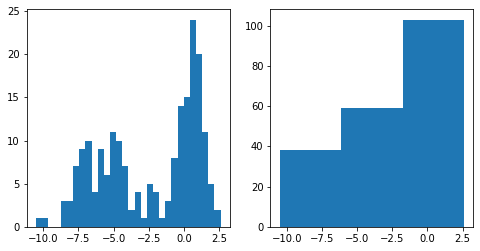

In [ ]:
from sklearn.datasets import make_blobs
import numpy as np
import matplotlib.pyplot as plt
X, y = make_blobs(n_samples=200, centers=2, n_features=1, random_state=16, cluster_std = [2, 0.8])

plt.figure(figsize=[8,4])
plt.subplot(1,2,1);plt.hist(X, bins=30);
plt.subplot(1,2,2);plt.hist(X, bins=3);
# a significant differnce based on number of bins

*  The kernel affect, via **KDE**, can be used to smoothen the resulting distribution instead of histograms.

best bandwidth: 0.5455594781168519
[-39.51611853]


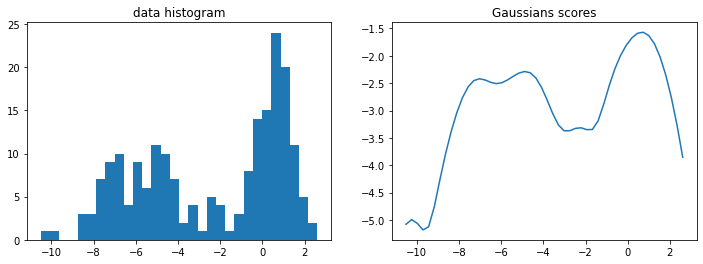

In [ ]:
from sklearn.neighbors import KernelDensity
import numpy as np
from sklearn.model_selection import GridSearchCV


# use grid search cross-validation to optimize the bandwidth
params = {"bandwidth": np.logspace(-1, 1, 20), 'kernel': 'gaussian'}
grid = GridSearchCV(KernelDensity(), params)
grid.fit(X, y)

print("best bandwidth: {0}".format(grid.best_estimator_.bandwidth))
# use the best estimator to compute the kernel density estimate
kde = grid.best_estimator_

plt.figure(figsize=[12,4])
plt.subplot(1,2,1);plt.hist(X, bins=30); plt.title('data histogram')
plt.subplot(1,2,2);
plt.plot(np.linspace(X.min(),X.max(), 50), kde.score_samples(np.linspace(X.min(),X.max(), 50).reshape(-1, 1)));
plt.title('Gaussians scores');

#if we estimate the score of an outlier x = -50, whereas the min of data is -10
print(kde.score_samples([[-15]]))

### Choosing the bandwidth

* We would like to find a value of the smoothing parameter that minimizes the error between the estimated density and the true densityn
* A natural measure is the mean square error at the estimation point x, defined by:

  <img height =50 src = "https://i.ibb.co/wCvwj2p/kde.png" />

* This expression is an example of the bias-variance dilemmaof statistics: the bias can be reduced at the expense of the variance, and vice versa.
* The bias-variance dilemma applied to bandwidth selection simply means that
  * A large bandwidth will reduce the differences among the estimates of $P_{KDE}(x)$ for different data sets (the variance) but it will increase the bias of $P_{KDE}(x)$ with respect to the true density $P(x)$
  * A small bandwidth will reduce the bias of $P_{KDE}(x)$, at the expense of a larger variance in the estimates $P_{KDE}(x)$
*The natural way for choosing the smoothing parameter is to plot out several curves and choose the estimate that is most in accordance with one’s prior (subjective) ideas
* However, this method is not practical in pattern recognition since we typically have high-dimensional data.
* The solution is to assume a standard density function and find the value of the bandwidth that minimizes the integral of the square error (MISE)
  $$\hat{h} = \underset{h}{\operatorname{ argmin}} MSE_x(P_{KDE})$$


### Gaussian kernel smoother

* The Gaussian kernel is one of the most widely used kernels for density estimation and anomaly detection.
*It is expressed with this formula:

  $$K_h(x,x_{i})=\exp \left(-{\frac  {(x-x_{i})^{2}}{2h^{2}}}\right)
  $$


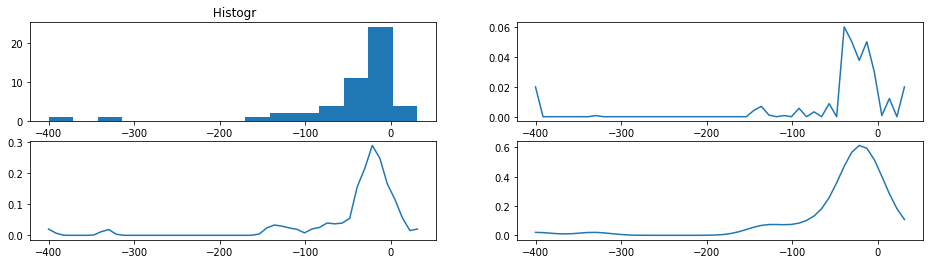

In [ ]:
#Generate data
B = [0.1, 0.2, 0.3, -0.4]    # [beta0, beta1, beta2, beta3]
X, y = generate_dataset(B, 50)

#apply kernel smoother on the distribution
sort_index = np.argsort(y)

h = [1,6,20]


plt.figure(figsize = [16, 4])
plt.subplot(2,2,1); plt.hist(y, bins = 15); plt.title(" Histogr")
i = 2
for h_0 in h:
  smoothed = []
  for y_0 in np.linspace(y.min(), y.max(), 50):
    smoothed.append((1/(len(y))) * np.sum( np.exp( - ( y - y_0)**2/ (2*h_0**2))))
  smoothed = np.array(smoothed)
  plt.subplot(2,2,i); plt.plot(np.linspace(y.min(), y.max(), 50), smoothed)
  i = i+1

### Nearest neighbor smoother

* For each point $X_0$, take $m$ nearest neighbors.
* Estimate the value of $Y(X_0)$ by averaging the values of these neighbors.

* Formally,
  $${ h_{m}(X_{0})=\left\|X_{0}-X_{[m]}\right\|}$$, where ${ X_{[m]}}$ is the $m^{th}$ closest neighbor to $X_0$ neighbor

  <img height =400 src ="https://upload.wikimedia.org/wikipedia/commons/thumb/9/92/NNSmoother.svg/1350px-NNSmoother.svg.png" />

Lets do a real anomlay detection example.

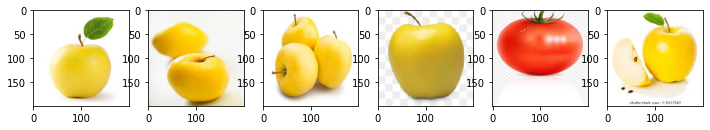

In [ ]:
# load data
import os
from matplotlib.image import imread
from PIL import Image

img_dir="/content/dataset"
all_files=os.listdir(img_dir)
data_path = [os.path.join(img_dir + "/" + i) for i in all_files]
k=0
data = []
plt.figure(figsize=[12,4])
for i in data_path:
  k=k+1
  plt.subplot(1,6,k)
  data.append(imread(i))
  plt.imshow(data[k-1])
plt.show()

In [ ]:
# Extract features
from sklearn import decomposition, datasets
from skimage.color import rgb2hsv
from sklearn.preprocessing import StandardScaler

data_hsv = [rgb2hsv(rgb_img)[:,:,0] for rgb_img in data]
features = [np.histogram(X, bins=5)[0][1:] for X in data_hsv]
# features
std_slc = StandardScaler()
X_std = std_slc.fit_transform(features)

pca = decomposition.PCA(n_components=2)
X_std_pca = pca.fit_transform(X_std)

Apply KDE and show the outlier

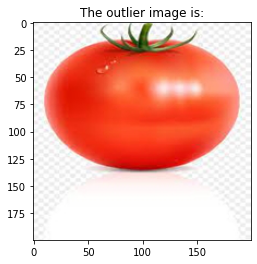

In [ ]:
params = {"bandwidth": np.logspace(-1, 1, 20)}
grid = GridSearchCV(KernelDensity(), params)
grid.fit(X_std_pca)
kde = grid.best_estimator_

scores = kde.score_samples(X_std_pca)
outlier_index = np.argmin(scores)

plt.imshow(data[outlier_index]);
plt.title('The outlier image is:');

# Graphical models

[ref1](http://mlg.eng.cam.ac.uk/zoubin/talks/lect2gm.pdf) [ref2](https://www.cs.ubc.ca/~murphyk/Bayes/bnintro.html)

* Probabilistic graphical models are graphs in which nodes represent random variables, and the arcs represent conditional independence assumptions.
* Tey provide a abstract and compact representation of joint probability distributions.
* A graphical model can be either **Undirected** or **Directed**
  * **Undirected** (i.e., called Markov Random Fields or Markov networks) have a simple definition of independence: two (sets of) nodes A and B are conditionally independent given a third node(set), C, if all paths between the nodes (in) A and B are separated by a node (set)in C.
  $$A ⫫ B|C⇔P(A,B|C) =P(A)P(B)$$
  * **Directed** (i.e., called Bayesian Networks or Belief Networks)  independency takes into account the directionality of the arcs (more complicated).
* Nodes may hold categorical (e.g., multinomial distributions) or continuous values (e.g., Gaussian distribution).
* For a discrete node with continuous parents, logistic/softmax distribution can be used.
* Using multinomials, Gaussians, and the softmax distribution, we can have a rich toolbox for making complex models.

## Directed Acyclic Graphical Models (DAG)

  <img height=200 src ="https://i.ibb.co/W2S6Www/graph-1.png" />

* A  DAG  Model  /  Bayesian network corresponds  to  a  factorization  of  the  joint probability distribution,
$$p(A,B,C,D,E) =p(A)p(B)p(C|A,B)p(D|B,C)p(E|C,D)$$
* In general: $$p(X1,...,Xn) =∏_{i=1}^np(Xi|X_{pa(i)})$$ where $pa(i)$ are the parents of node $Xi$
* Therfore, the Conditional Probability Distribution (CPD) for each node must be specefied in advance.

**Example:** Consider this example, in which all nodes are binary (True(T) or False(F)).

<img src="https://i.ibb.co/Xk5gwtK/graph-4.png" />

* By defenition, the joint probability of all the nodes in the graph above is

$$P(C_0, C_1, C_2, C_3) = P(C_0) * P(C_1|C_0) * P(C_2|C_0)   * P(C_3|C_1,C_2)$$
  e.g., $P(T, F, F, T) = 0.5 * 0.9 * 0.8 * 0.2 = 0.07$
  
  whereas, $P(T, F, F, F) = 0.5 * 0.9 * 0.8 * 1 = 0.37$

##Inference

  <img height=200 src ="https://i.ibb.co/W2S6Www/graph-1.png" />

* The most common task we wish to solve using Bayesian networks is probabilistic inference.
* It consists in evaluating the probability distribution over some set of variables, given the values of another set of variables.
* For example, how can we compute $p(A|C=c)$?  Assume each variable is binary, a naive method for calculation is:
  * $p(A,C=c)    =\underset{B,D,E}{∑}p(A,B,C=c,D,E)$ .......... [16 terms]
  * $p(C=c)    =\underset{A}{∑}p(A,C=c)$ ........ [2 terms]
  * $p(A|C=c)    = \frac{p(A,C=c)}{p(C=c)}$...........[2 terms]
  * Total:  16+2+2 = 8 terms

**Example**:
  * consider the water sprinkler network, and suppose we observe the fact that the grass is wet.
  * Either it is raining, or the sprinkler is on.
    * $P(C_1 = T| C_3 = T) = \frac{p(C_1 = T,C_3 = T)}{p(C_3 = T)} = \frac{\underset{B,D,E}{∑}p(C_ 0, C_1 = T,C_3 = T)} {p(C_3 = T)} = \frac{0.5 × 0.1 × 0.9 + 0.5 × 0.5 × 0.9}{0.6945} = 0.43$
    * $P(C_2 = T| C_3 = T) = 0.70$

* It is more likely that the grass is wet because it is raining: the likelihood ratio is $0.7079/0.4298 = 1.647$.


**More efficient method:**
<img height=200 src ="https://i.ibb.co/W2S6Www/graph-1.png" />

* $p(A,C=c)    =\underset{B,D,E}∑p(A)p(B)p(C=c|A,B)p(D|B,C=c)p(E|C=c,D)$
* $\ \ \  =\underset{B}{∑}p(A)p(B)p(C=c|A,B)\underset{D}{∑}p(D|B,C=c)\underset{E}{∑}p(E|C=c,D)$
* $\ \ \ =\underset{B}{∑}p(A)p(B)p(C=c|A,B)$.........................[4 terms]
* Total:  4+2+2 = 8 terms

* In the above example, notice that the two causes "compete" to "explain" the observed data 'Wet grass'.
* Hence *Sprinkle* and *Rain* become conditionally dependent given that their common child, *WetGrass* ( even though they are marginally independent.)
* **For example:**
  * suppose the grass is wet, but that we also know that it is raining.
  * Then the posterior probability that the sprinkler is on goes down:
  * $Pr(C_1=1|C_3=1,C_2=1) = 0.1945$
* This phenomenon is called "explaining away" (either event alone is sufficient to explain the evidence on $C_3$).

**Top-down vs bottom-up reasoning**:
* Bottom up reasoning (i.e., This is called diagnostic) is when moving from effects to causes (e.g., what is the cause of wet grass (effect)?)
* Top down reasoning (i.e., causal) is when moving from causes to effect (e.g.,  probability that the grass will be wet given that it is cloudy).
* Bayes nets be used for both types of reasoning.

## Factor graph propagation

* Algorithmically  and  implementationally,  it’s  often  easier  to  convert  directed  andundirected graphs into factor graphs, and run factor graph propagation.
$$p(x)  =p(x1)p(x2|x1)p(x3|x2)p(x4|x2)$$
$$≡f1(x1,x2)f2(x2,x3)f3(x2,x4)$$

<img src ="https://i.ibb.co/wptzJm2/graph-5.png" />

* The joint probability distribution is written as a product of factors.
  * Consider a vector of variables $x= (x_1,...,x_n)$
  $$p(x) =p(x_1,...,x_n) =\frac{1}{Z}∏_jf_j(x_{S_j})$$
    * where $Z$ is  the  normalisation  constant
    * $S_j$ denotes  the  subset  ${1,...,k}$ which participate in the factor $f_j$
    * $x_{S_j} = \\{ x_i:i∈S_j\\}$
    * open circles are for variable nodes $x_i$ and filled dots for   factor nodes $f_i$


So, how propagation proceeds in **Factor Graphs**?

* Let $n(x)$ denote the set of factor nodes that are neighbors of $x$.
* Let $n(f)$ denote the set of variable nodes that are neighbors of $f$.
* Then,  probabilities are computed by  propagating  messages  from variable nodes to factor nodes and viceversa.
  * message from variable $x$ to factor $f$ :
  $$μ_{x→f}(x)  =\underset{h∈n(x) \text{\\} \text{{f}}}{∏}μ_{h→x}(x)$$

  * message from factor $f$ to variable $x$:
  $$μ_{f→x}(x) = \underset{×\text{\\}x}{∑} \bigg{(}f(×)\underset{y∈n(f)\text{\\}{x}}{∏}μ_{y→f(y)}\bigg{)}$$
  * where $×$ are  the  variables  that  factor $f$ depends  on,  and $ × / x $ is  all variables neighboring factor $f$ except $x$.
* If a variable has only one factor as a neighbor, it can initiate message propagation.

* Once  a  variable  has  received  all  messages  from  its  neighboring  factor  nodes,  it  compute  its  probability  by  multiplying  all  the  messages  and renormalising: $$p(x)∝\underset{h∈n(x)}{∏}μ_{h→x}(x)$$



##Hidden Markov Models (HMMs)

* Hidden Markov Model (HMM) is the simplest kind of Dynamic Bayesian Networks (DBNs).
* ​DBN is a Bayesian network extended with additional mechanisms that are capable of modeling influences over time.
* The temporal extension of Bayesian networks does not mean that the network structure or parameters changes dynamically, but that a dynamic system is modeled.
* A DBN is a model of a stochastic process.
* HMM has one discrete hidden node and one discrete or continuous observed node per slice.

  <img height=200 src ="https://i.ibb.co/FnsjyXh/HMM-3.png" />
* Inference in Hidden markov models and Linear Gaussian state-space models is estimated as follow: $$p(Q1,...,Q_N,Y1,...,Y_N) =p(Q_1)p(Y_1|Q_1)∏_{t=2}^N[p(Q_t|Q_{t−1})p(Y_t|Q_t)]$$
  * In HMMs, the states $Q$ are discrete.
  * In linear Gaussian SSMs (State space models), the states are real Gaussian vectors.
  * Both HMMs and SSMs can be represented as singly connected DAGs (at most one path between $u$ and $v$).
  * The  forward–backward  algorithm  in  hidden  Markov  models  (HMMs),  and  the Kalman smoothing algorithm in SSMs are both instances of belief propagation /factor graph propagation.


* As it appears, the structure and parameters are assumed to repeat as the model is unrolled further.
* Therefore, to specify a DBN, we need to define the intra-slice topology (within a slice), the inter-slice topology (between two slices), as well as the parameters for the first two slices. (Such a two-slice temporal Bayes net is often called a 2TBN.)

<img width=1400 src ="https://i.ibb.co/pxwKdfZ/HMM-2.png" />

**Topologies**:

* Normaly, the natural ordering of time needs to be preserved by preventing HMM from transitioning to previous states.
*  This restriction leads to what known as a left-right HMM ( commonly used for sequential modeling).
* A linear topology is one in which transitions are only permitted to the current state and the next state.
* If transitions to any state at any time exist, it is known as ergodic.

  <img src="https://sequentia.readthedocs.io/en/latest/_images/topologies.svg" />

**HMM: Parameters and Training**
A HMM is completely determined by the following parameters:
* Initial state distribution vector $𝞹$ of size $n$: The probability of starting in each state.
* Transition probability matrix **$A$** of size $n×n$: How likely  is to transit to each state, given some current state.
* Emission probability distributions vector $B$ of size $n$:  the probability of generating an observation $o^t$ , given some current state $s_t$.  

*Example:*

<img height=250 src ="https://i.ibb.co/bByjKWZ/HMM-4.png" />



In [ ]:
states = ('Rainy', 'Sunny')

observations = ('walk', 'shop', 'clean')

start_probability = {'Rainy': 0.6, 'Sunny': 0.4}

transition_probability = {
   'Rainy' : {'Rainy': 0.7, 'Sunny': 0.3},
   'Sunny' : {'Rainy': 0.4, 'Sunny': 0.6},
   }

emission_probability = {
   'Rainy' : {'walk': 0.1, 'shop': 0.4, 'clean': 0.5},
   'Sunny' : {'walk': 0.6, 'shop': 0.3, 'clean': 0.1},
   }

* An HMM algorithm may consist of one or more of the steps : **Forward, Backword**, and **Update**
* The six common problems [[link](http://jedlik.phy.bme.hu/~gerjanos/HMM/node6.html), [link](https://math.stackexchange.com/questions/1072607/what-are-filtering-and-smoothing-with-regards-to-hidden-markov-models)]that can be solved using HMM are the filtering, smoothing, forecasting, evaluating, decoding, and learning problems.
  * Evaluating, filtering, and forecasting problems can be solved using the forward algorithm
  * smoothing problem can be solved using the forward algorithm and backward algorithm
  * Decoding problem can be solved using the Viterbi algorithm;
  The learning problem, solved through MLE can, can be solved by forward algorithm to calculate the likelihood.

* In order to learn the afromentioned parameters $θ = (𝛑, A, B)$, the model must be trained on labeled samples.
  * The time-independent stochastic transition matrix ${\displaystyle A=\{a_{ij}\}=P(X_{t}=j\mid X_{t-1}=i).}$
  * The initial state distribution (i.e. when $t=1$) is given by ${\displaystyle \pi _{i}=P(X_{1}=i).}$
  * The probability of a certain observation $y_{i}$ at time $t$ for state $ X_{t}=j$ is given by
${\displaystyle b_{j}(y_{i})=P(Y_{t}=y_{i}\mid X_{t}=j).}$
* ***Baum-Welch*** algorithm, which is an application of the Expectation-Maximization algorithm to HMMs, can be used to tune these paramaters.$$ {\displaystyle \theta ^{*}=\operatorname {arg\,max} _{\theta }P(Y\mid \theta )}{\displaystyle }$$

where ${\displaystyle Y=(Y_{1}=y_{1},Y_{2}=y_{2},\ldots ,Y_{T}=y_{T})}$ is an observation sequence

**Algorithm:**
For simplicity, let's consider the outcomes as univariate variables.

* **Step 1**: Initialize

  Set $\theta =(𝛑,A,B)$ to random initial conditions. Can set to prior information if  available, to speed up and steer toward a desired local maximum.

* **Step 2**: Forward procedure

  Let $ \alpha _i(t)=P(Y_{1}=y_{1},\ldots ,Y_{t}=y_{t}, X_{t}=i\mid \theta )$, be the probability of seeing the observations ${\displaystyle y_{1},y_{2},\ldots ,y_{t}}$ and being in state $i$ at time $t$. recursively estimated:
  * ${\displaystyle \alpha _{i}(1)=\pi _{i}b_{i}(y_{1}),}$
  * ${\displaystyle \alpha _{i}(t+1)=b_{i}(y_{t+1})\sum _{j=1}^{N}\alpha _{j}(t)a_{ji}.}$

* This step can be used to solve the evaluating problem by: $$L_ t \equiv p(Y _1, \ldots , Y _ t) = \sum _{j=1}^{K}{\alpha _{t}(j)}$$
  * Because the likelihood of all observations, $L_T$, can be calculated, we can apply the maximum likelihood method to estimate the unknown parameter.
  * If the prior distribution of the parameter is given, you can also apply the MAP method.
* This step can also be used to solve the filtering problem by:$$p_t(i) \equiv p(S _ t=i | Y _1, \ldots , Y _ t) = \alpha _ t(i) / L_ t $$
* We can also solve the forecast problem, because the h-step-ahead prediction of the state probability can be calculated via filtering
* **Step 3**: Backward procedure

  Let $ \beta _{i}(t)=P(Y_{t+1}=y_{t+1},\ldots ,Y_{T}=y_{T}\mid X_{t}=i,\theta )$ that is the probability of the ending partial sequence $y_{t+1},\ldots ,y_T$ given starting state $i$ at time $t$. recursively calculated:
  * ${\displaystyle \beta _{i}(T)=1,}$
  * $\beta _{i}(t)=\sum _{j=1}^{N}\beta _{j}(t+1)a_{ij}b_{j}(y_{t+1}).$
  * The smoothing problem is solved, because we can calculate the probability of curent state given all past and future states. $$\gamma _{i}(t)=P(X_{t}=i\mid Y,\theta )={\frac {P(X_{t}=i,Y\mid \theta )}{P(Y\mid \theta )}}={\frac {\alpha _{i}(t)\beta _{i}(t)}{\sum _{j=1}^{N}\alpha _{j}(t)\beta _{j}(t)}}$$


* **Step 4**: update
  calculate the temporary variables, according to Bayes theorem:
  
   * $\gamma _{i}(t)=P(X_{t}=i\mid Y,\theta )={\frac {P(X_{t}=i,Y\mid \theta )}{P(Y\mid \theta )}}={\frac {\alpha _{i}(t)\beta _{i}(t)}{\sum _{j=1}^{N}\alpha _{j}(t)\beta _{j}(t)}}$

  * ${\displaystyle \xi _{ij}(t)=P(X_{t}=i,X_{t+1}=j\mid Y,\theta )={\frac {P(X_{t}=i,X_{t+1}=j,Y\mid \theta )}{P(Y\mid \theta )}}={\frac {\alpha _{i}(t)a_{ij}\beta _{j}(t+1)b_{j}(y_{t+1})}{\sum _{k=1}^{N}\sum _{w=1}^{N}\alpha _{k}(t)a_{kw}\beta _{w}(t+1)b_{w}(y_{t+1})}},}$

  The parameters of the hidden Markov model $\theta$  can now be updated:
  
  * ${\displaystyle \pi _{i}^{*}=\gamma _{i}(1),}$
  
  the expected frequency spent in state $i$ at time $1$.

  * $ a_{ij}^{*}={\frac {\sum _{t=1}^{T-1}\xi _{ij}(t)}{\sum _{t=1}^{T-1}\gamma _{i}(t)}},$
  
  the expected number of transitions from state $i$ to state $j$ compared to the expected total number of transitions away from state $i$.

  * ${\displaystyle b_{i}^{*}(v_{k})={\frac {\sum _{t=1}^{T}δ_{y_{t}v_{k}}\gamma _{i}(t)}{\sum _{t=1}^{T}\gamma _{i}(t)}},}$ where $δ_{y_{t}v_{k}}={\begin{cases}1&{\text{if }}y_{t}=v_{k},\\0&{\text{otherwise}}\end{cases}}$

  the output observations have been equal to $v_{k}$ while in state $i$

These steps are repeated iteratively until a desired level of convergence.


**Example:**
* A farmer collects chicken eggs at noon every day.
* chicken eggs laying depends on some unknown factors that are hidden.
* A Chicken is always in one of two states , that depends on the state of the previous day, that influence whether the chicken lays eggs.
* the state at the initial starting point, the transition probabilities between the two states, and probability that the chicken lays an egg given a particular state are unknown.
* Firstly, the transition and emission matrices are randomly set.
<img src="https://i.ibb.co/6Dk7F3z/HMM-Example.png" />

* Suppose that have the following set of observations over days ($E$ = eggs, $N$ = no eggs): $N, N, N, N, N, E, E, N, N, N$
* This gives a set of observed transitions between days ($Y$): $NN, NN, NN, NN, NE, EE, EN, NN, NN$
* Estimate a new transition matrix via maximizing observation probabilities given initial $\theta$ (i.e., $P(Y, X|\theta)$). For example, the probability of the sequence $NN$ and the state being $S_{1}$ then $S_{2}$ is given by: ${P(Y_1=N, Y_2=N, X_1=S1, X_2=S_2) = P(X_1 = S_{1})*P(Y_1 = N|X_1 = S_{1})*P(X_2 = S_2| X_1= S_1)*P(Y_2 = N|X_2 = S_{2}).}$
* To calculate the new probability for the transition $S1 → S2$

<img src ="https://i.ibb.co/d6ztBjj/HMM-Example2.png" width=900 />

*  The new estimate for the $S_{1}$ to $S_{2}$ transition is now ${\frac {0.22}{2.4234}}=0.0908$
* Likewise, calculate the other transition probabilities and normalize, so they add to 1.


<img src="https://i.ibb.co/RCSLVLF/HMM-Example-3.png" />

* Estimate the new emission matrix. For example, the probability of an observation $NE$ given that $E$ come from $S_1$ (i.e., $P(Y_1 = N, Y_2 = E, X_2=S_1$)

<img src = "https://i.ibb.co/61nQ5M5/HMM-Example-4.png" />

* The new estimate for the E coming from $ S_{1}$ emission is now $\frac {0.2394}{0.2730}=0.8769$

* Repeat for if $N$ came from $S_{1}$ and for if $N$ and $E$ came from $S_{2}$ and normalize.

 <img src ="https://i.ibb.co/CvLQMZy/HMM-Example-5.png" />

* To estimate the initial probabilities we assume all sequences start with the hidden state $S_{1}$ and calculate the highest probability and then repeat for $S_{2}$. Again we then normalize to give an updated initial vector.

Finally we repeat these steps until the resulting probabilities converge satisfactorily.

**Gaussian Hidden Markov Model**
* In Gaussian HMM, the observation probability distribution is a normal distribution $$Y_t|X_t∼N(μ_{X_t},Σ_{X_t})$$
* Therefore, the probability of a certain observation $y_{i}$ at time $t$ for state $ X_{t}=j$ is given by *mean* and *covariance* parameters ($B\equiv \{ \mu _ i, \Sigma _ i \} _{i=1,\ldots ,K}$) of a multivariate gaussian instead.
* That is, the parameter  of the Gaussian HMM is $ \theta = ( \pi ,A ,B ) $.
* In Gaussian mixture HMM, the observation probability distribution is a Gaussian mixture distribution $$ Y _{t} | X_{t} \sim GM(\{ w_{X_t,1},\ldots ,w_{X_t,M}\} , \{ \mu _{X_t,1},\ldots ,\mu _{X_t,M}\} , \{ \Sigma _{X_t,1},\ldots ,\Sigma _{X_t,M}\} ) $$

**Example 1:**

The following example shows how to train an HMM and use it to forecast the future.

* Collect Gold stock market price history

In [ ]:
# !pip install yfinance
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Get the data for Gold
data = yf.download('GC=F','2020-01-01','2022-12-12')
#stationary price
stat_data = (data.Close.values[1:]- data.Close.values[:-1]).astype(int)
#replace it with categorical observations
stat_data[stat_data<0] = 0
stat_data[stat_data>0] = 1
stat_data[0:10]

[*********************100%***********************]  1 of 1 completed


array([1, 1, 1, 0, 0, 1, 0, 0, 1, 0])

* Train HMM model and predict forecast

In [ ]:
import numpy as np
from hmmlearn import hmm


n_fits = 500
train = stat_data[0:-100]
val = stat_data[-100:]
best_score = None
#try n fits to avoid local minima
for idx in range(n_fits):
    model = hmm.CategoricalHMM(n_components=2, init_params='se',
                                         n_iter=500, random_state=idx)
    model.transmat_ = np.array([np.random.dirichlet([0.7, 0.3]),
                                np.random.dirichlet([0.3, 0.7])])
    model.fit(train.reshape(-1,1))

    if best_score is None or model.score(val.reshape(-1,1)) > best_score:
        best_model = model

# Is is more probable for gold to rise or fall in the the three next days successively
if (model.score(np.concatenate([stat_data[-20:-4], np.array([1,1,1])]).reshape(-1,1)) >
     model.score(np.concatenate([stat_data[-20:-4], np.array([0,0,0])]).reshape(-1,1))):
  print('-The model predicts that Gold price will rise')
else:
  print(-'The model predicts that Gold price will fall')

print('-What truly happened:', stat_data[-4:])



-The model predicts that Gold price will rise
-What truly happened: [1 1 1 1]
